In [1]:
def split_it(text):
    splt = text.split()
    bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]

    for i in range(len(splt)):
        for b in bad_chars:
            if b in splt[i]:
                splt[i] = splt[i].replace(b, '')
        splt[i]= splt[i].lower()
    
    return splt

In [2]:

from pathlib import Path
from collections import Counter
from nltk.stem import PorterStemmer
import math
from decimal import *
import numpy as np
import pandas as pd
from IPython.display import display




def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier




#CALCULATES THE IG OF EACH WORD
def IG(w, total_pos, total_neg, path_pos, path_neg):
    total_reviews= total_pos + total_neg
    
    
     
    files_positive = Path(path_pos).glob('*.txt')
    files_negative = Path(path_neg).glob('*.txt')
     
    
    
    P1= (total_pos/total_reviews)  #probability of positive reviews
    P0= (total_neg/total_reviews)  #probability of negative reviews
    
    entropy= -P1*math.log2(P1)-P0*math.log2(P0)
    
    
    #Probabilities of C=pos and w=1 & C=neg and w=1
    pos_counter=0
    neg_counter=0 
    total_counter=0
    

    
    for f in files_positive:
        sp= f.read_text().split()
        if w.lower() in [x.lower() for x in sp]:
            pos_counter+=1
            total_counter+=1
      
    for f2 in files_negative:
        sp2= f2.read_text().split()
        if w.lower() in [x.lower() for x in sp2]:
            neg_counter+=1
            total_counter+=1
    
    
    #Probability of w=1 and w=0 
    P_w1 = total_counter/total_reviews
    #print("Probability of ", w, "=1: ", P_w1)
    P_w0 = (total_reviews- total_counter) / total_reviews
    #print("Probability of ", w, "=0: ", P_w0)

        
   
    #Probability of a C=pos and C=neg when w=1
    if P_w1!=0:
        P1_w1= pos_counter/total_counter 
        #print("probability positive reviews with ", w,"=1: ", P1_w1)
        P0_w1= neg_counter/total_counter
        #print("probability negative reviews with ", w,"=1: ", P0_w1)
    else:
        P1_w1=0
        P0_w1=0
    
    
    
    #Probability of a C=pos and C=neg when w=0
    if P_w0!=0:
        P1_w0 = (total_pos-pos_counter)/(total_reviews- total_counter)
        #print("probability positive reviews with ", w,"=0: ", P1_w0)
        P0_w0 = (total_neg-neg_counter)/(total_reviews - total_counter)
        #print("probability negative reviews with ", w,"=0: ", P0_w0)
    else:
        P1_w0 = 0
        P0_w0 = 0
    
    
    entropy_w1= (0 if P1_w1==0 else -P1_w1*math.log2(P1_w1)) - (0 if P0_w1==0 else P0_w1*math.log2(P0_w1))
    #print("Entropy of ", w, "=1: ", entropy_w1)
    entropy_w0= (0 if P1_w0==0 else -P1_w0*math.log2(P1_w0)) - (0 if P0_w0==0 else P0_w0*math.log2(P0_w0))
    #print("Entropy of ", w, "=0: ", entropy_w0)

    
    if entropy!=1.0:
        ig= truncate_float(entropy, 6) - truncate_float((P_w1*entropy_w1 + P_w0*entropy_w0), 6)
    else:
        getcontext().prec = 6
        ig= Decimal(1) - Decimal((P_w1*entropy_w1 + P_w0*entropy_w0))
       
    
    
    #print("IG of ",w , "is: ", ig)
    
    return float(ig)







#FILTERS AN ARRAY OF WORDS BASED ON THEIR IG
def IG_filter(words_filtered, total_pos, total_neg, path_pos, path_neg):
    result=[]
    
    for w in words_filtered:
        ig=IG(w, total_pos, total_neg, path_pos, path_neg)
        if ig >=0.008:
            result.append(w)
    
    return result



In [3]:
def split_it(text):
    splt = text.split()
    bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]

    for i in range(len(splt)):
        for b in bad_chars:
            if b in splt[i]:
                splt[i] = splt[i].replace(b, '')
        splt[i]= splt[i].lower()
    
    return splt

In [4]:
import os

class tokenizer():

    #FINDING THE MOST USEFUL ATTRIBUTES (WORDS) IN ALL THE TRAINING DATA
    #CONVERTING THE TRAINING DATA INTO VECTORS OF THE ATTRIBUTES WE CHOSE
    def tokenize(self,path_pos, path_neg):
        
        files_positive = Path(path_pos).glob('*.txt')
        files_negative = Path(path_neg).glob('*.txt')
        
        

        total_pos=0
        total_neg=0

        text= ""
        i=0
        for file in files_positive:
            #print(file.name)
            
            text= text+file.read_text()  # the file is opened and closed
            total_pos += 1
            
            
        for file2 in files_negative:
            #print(file.name)
            
            total_neg+=1
            text= text+file2.read_text()  
            


        total_reviews= total_pos+total_neg  

        print("Total positive reviews: ",  total_pos)
        print("Total negative reviews: ", total_neg)



        #FILTERING THE REVIEWS TO KEEP THE USEFUL WORDS
    


        
        splt= split_it(text)
        Counters_found = Counter(splt)
        most_occur = Counters_found.most_common(700)



        ps = PorterStemmer()
        words=[]
        for i in range(len(most_occur)):
            words.append(most_occur[i][0])
                

        bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]
        words_to_exclude = ['-', '--', ';', ':', "!", "*", " ", "(", ")", '\"', ".", 'it\'s', 'br', 'mr', 'there\'s', 'your', 'wasn\'t', 'Ms', 'were', 'how', 'get', 'will', 'also', 'been', 'some', 'into', 'because', 'about', 'out', 'me', 'up', 'down', 'my', 'mine', 'their', 'she', 'he\'s', 'the','you', 'an', 'his', 'him', 'her', 'or', 'was', 'have', 'has', 'had', 'in', 'i', 'he', 'we', 'they', 'their', 'theirs', 'which','what', 'where', 'be', 'they', 'has', 'so',  'by', 'who', 'that','this', 'those', 'your', 'these', 'on', 'there', 'and', 'to', 'a', 'it', 'its', 'for', 'if', 'then', 'is', 'at', 'are', 'of', 'no', 'as', 'but', 'with', 'there']    

        words_filtered=[]
        for i, w in enumerate(words):
            
            
            for b in bad_chars:
                if b in words[i]:
                    words[i]= words[i].replace(b,'')
                    w=words[i]
                

            
            
            if w.lower() in words_to_exclude:
                #print('removing ' +w)
                #words.remove(w)
                continue

            words_filtered.append(words[i])        
                


        words_filtered= words_filtered[:len(words_filtered)-128]
        
        
                
        # c=1
        # for i in  words_filtered:
        #     print(c,'. '+i)
        #     c=c+1
            


        
        self.words_final= IG_filter(words_filtered, total_pos, total_neg, path_pos, path_neg)

            
            
        files_positive2 =Path(path_pos).glob('*.txt')
        files_negative2= Path(path_neg).glob('*.txt')
            
        #TOKENIZES EACH TEXT IN THE MOST USEFUL WORDS WE FOUND
        self.vectors= np.zeros([total_reviews, len(self.words_final)+1], dtype=int)
        i=0
        for file in files_positive2:
            i+=1
            for j,w in enumerate(self.words_final):
                if w.lower() in file.read_text().lower():
                    self.vectors[i][j]=1
            self.vectors[i][len(self.words_final)]=1  # initializing the last cell as 1 (category cell)
    
        i=0
        for file2 in files_negative2:
            i+=1
            for j, w in enumerate(self.words_final):
                if w.lower() in file2.read_text().lower():
                    self.vectors[i][j]=1
            #the last cell in the negative reviews is already 0 
        
        
        vectors_df= pd.DataFrame(self.vectors, columns=self.words_final+ ['Category'])
        display(vectors_df)
        
        return self.vectors
    
    
    
    def get_words_final(self):
        return self.words_final
    
    
    
    
    
    
    def tokenize_new(self, path_pos, path_neg ):
        
        files_positive3 =Path(path_pos).glob('*.txt')
        files_negative3= Path(path_neg).glob('*.txt')
        
        pos_count = len(os.listdir(path_pos))
        neg_count = len(os.listdir(path_neg))
        total_count =pos_count + neg_count
        
        new_vectors= np.zeros([total_count, len(self.words_final)+1], dtype=int)
        
        
        i=0
        for f in files_positive3:
            i+=1
            for j,w in enumerate(self.words_final):
                if w.lower() in f.read_text().lower():
                    new_vectors[i][j]=1
            new_vectors[i][len(self.words_final)]=1  # initializing the last cell as 1 (category cell)
    
        i=0
        for f2 in files_negative3:
            i+=1
            for j, w in enumerate(self.words_final):
                if w.lower() in f2.read_text().lower():
                    new_vectors[i][j]=1
            #the last cell in the negative reviews is already 0 
        
        
        
            
        vectors_df= pd.DataFrame(new_vectors, columns=self.words_final+ ['Category'])
        display(vectors_df)
        
        return new_vectors, vectors_df
            
            

In [5]:

class Probability:
    
    def __init__(self, data, total_pos, total_neg):
        self.data= data
        self.total_pos = total_pos
        self.total_neg = total_neg
    
    
    
    
    
    def prob_tables_training_data(self):
        
        #print("Starting to build the probability tables")
        self.pX_1= np.zeros([2,self.data.shape[1]], dtype=float)
        self.pX_1[1][self.data.shape[1]-1] = 1 
        self.pX_0 = np.zeros([2,self.data.shape[1]], dtype=float)
        self.pX_0[1][self.data.shape[1]-1] = 1 
        
        
        #P(X|C=0)
        for j in range(self.data.shape[1]-1):  #we use -1 in order not to count the probability of the category row too
            X1_C0 = 0
            X0_C0 = 0
            for i in range(self.data.shape[0]):
                if self.data[i][self.data.shape[1]-1] != 0:
                    continue
                
                if self.data[i][j] ==1:
                    X1_C0+=1
                else: 
                    X0_C0+=1
                
                    
            self.pX_1[0][j]= (X1_C0+1)/(self.total_neg+2)
            self.pX_0[0][j] = (X0_C0+1)/(self.total_neg+2)
            #print(self.pX_1[0][j], self.pX_0[0][j])
            
            
        #P(X|C=1)
        for j in range(self.data.shape[1]-1):  #we use -1 in order not to count the probability of the category row too
            X1_C1 = 0
            X0_C1 = 0
            for i in range(self.data.shape[0]):
                if self.data[i][self.data.shape[1]-1] != 1:
                    continue
                
                if self.data[i][j] ==1:
                    X1_C1+=1
                else: 
                    X0_C1+=1
                    
            self.pX_1[1][j]= (X1_C1+1)/(self.total_pos+2)
            self.pX_0[1][j] = (X0_C1+1)/(self.total_pos+2)
            #print(self.pX_1[1][j], self.pX_0[1][j])
    
        
        
        #print("Finished building the probability tables")
    
  
     
    
    
    
    def P1_X(self, vector):
        p1= self.total_pos/(self.total_pos+self.total_neg)
        
        pX_C1 =1
        for i, w in enumerate(vector):
            if w==0:
                pX_C1 = pX_C1*self.pX_0[1][i]
            else: 
                pX_C1 = pX_C1*self.pX_1[1][i]
                
            
            
        return pX_C1*p1 



    def P0_X(self, vector):
        p0= self.total_neg/(self.total_pos+self.total_neg)
        
        pX_C0 =1
        for i, w in enumerate(vector):
            if w==0:
                pX_C0 = pX_C0*self.pX_0[0][i]
            else: 
                pX_C0 = pX_C0*self.pX_1[0][i]
            
            
        return pX_C0*p0
    
    

In [6]:

def classification_report(y_real, y_pred, p=1):
    #print(y_pred)
    reports= np.zeros([3,5])
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    support1= 0
    support0= 0
    
    # corr_ident= 0
    # incorr_ident= 0  
    # total_neg= 0
    for i, y in enumerate(y_pred):
        if y== y_real[i] and y==1:
            true_pos+=1
        if y!= y_real[i] and y==1:
            false_pos+=1
        if y!= y_real[i] and y==0:
            false_neg+=1
        if y==y_real[i] and y==0:
            true_neg+=1
        if y_real[i]==1:
            support1+=1
            
    if (true_pos+false_neg) != 0:
        recall= true_pos/(true_pos+false_neg)
    else:
        recall=0
    
    if(true_pos+false_pos) !=0:
        precision = true_pos/ (true_pos +false_pos)
    else:
        precision=0
    
    
    

    # print(recall)
    # print(precision)
    if (precision+recall) !=0 :
        f1_score= 2*(precision*recall)/(precision+recall)
    else:
        f1_score=0
        
    accuracy = (true_pos + true_neg) / len(y_real)
    
    reports[1][0]= recall
    reports[1][1]= precision
    reports[1][2]= f1_score
    
    reports[1][4] = support1
    
    if(true_neg+false_pos)!=0:
        #print('Percentage of negatives found correctly: ', true_neg/(true_neg+false_pos) )
        
        reports[0][3]= true_neg/(true_neg+false_pos)
    
    if (true_pos+false_neg) !=0:
        #print('Percentage of positives found correctly: ', true_pos/(true_pos+false_neg))
        reports[1][3]= true_pos/(true_pos+false_neg)
    
    
    
    # reports[2][0] = accuracy 
    # reports[2][1] = accuracy 
    # reports[2][2] = accuracy 
    # reports[2][3] = len(y_real) 
    
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i, y in enumerate(y_pred):
        if y== y_real[i] and y==0:
            true_pos+=1
        if y!= y_real[i] and y==0:
            false_pos+=1
        if y!= y_real[i] and y==1:
            false_neg+=1
        if y==y_real[i] and y==1:
            true_neg+=1
        if y_real[i]==0:
            support0+=1
    if (true_pos+false_neg) != 0:
        recall= true_pos/(true_pos+false_neg)
    else:
        recall=0
    
    if(true_pos+false_pos) !=0:
        precision = true_pos/ (true_pos +false_pos)
    else:
        precision=0
    
    # print(recall)
    # print(precision)
    if (precision+recall) !=0 :
        f1_score= 2*(precision*recall)/(precision+recall)
    else:
        f1_score=0
    
    reports[0][0]= recall
    reports[0][1]= precision
    reports[0][2]= f1_score
    
    reports[0][4] = support0
    
    
    reports[2][0] = accuracy
    reports[2][1]= accuracy
    reports[2][2] = accuracy
    reports[2][3] = accuracy
    reports[2][4] = support0 + support1
    
    
    
    
    
    
    
    # support_proportion0= support0/len(y_real)    
    # support_proportion1= support1/len(y_real)
    
    
    # macro_avg_p= (reports[0][1]+reports[1][1])/2
    # macro_avg_r= (reports[0][0] + reports[1][0])/2
    # macro_avg_f1 = (reports[0][2] + reports[1][2])/2
    
    # weighted_avg_r = (reports[0][0]*support_proportion1 + reports[1][0]*support_proportion0)
    # weighted_avg_p= (reports[0][1]*support_proportion1 + reports[1][1]*support_proportion0)
    # weighted_avg_f1= (reports[0][2]*support_proportion1 + reports[1][2]*support_proportion0)
    
    # reports[3][0] = macro_avg_r
    # reports[3][1] = macro_avg_p
    # reports[3][2] = macro_avg_f1
    # reports[3][3] = len(y_real)
    
    # reports[4][0]= weighted_avg_r
    # reports[4][1]= weighted_avg_p
    # reports[4][2] = weighted_avg_f1
    # reports[4][3] =len(y_real)
    
    
    reports_df= pd.DataFrame(reports, columns=['Recall', 'Precision', 'F1-score', 'Accuracy', 'Support'], index=['0','1', 'general accuracy'])
    
    if p==1:
        
        print('positives that didn\'t find: ', false_neg)
        print('negatives that didn\'t find: ', false_pos)
        
        display(reports_df)
    
    return reports
    
    

In [7]:
#SPLIT FUNCTION IN ORDER TO SPLIT DATA INTO X AND Y
def split(vectors):
    x = vectors[:,:-1]
    y = vectors[:,-1]
    return x, y

In [8]:
class naive_bayes:

        
    
    def fit(self, x, y):
        self.total_pos= 0
        self.total_neg=0
        self.data= np.zeros([x.shape[0],x.shape[1]+1], dtype=int)
        for i in range(x.shape[0]):
            
            for j in range(x.shape[1]):
                #if j== self.data.shape[1]:
                 #   self.data[i][j]= y[i]
                
                self.data[i][j]= x[i][j]
                
            

        for i in range(self.data.shape[0]):
            self.data[i][self.data.shape[1]-1]= y[i]
            if y[i]== 1:
                self.total_pos+=1
            else:
                self.total_neg+=1
                    
        
        #data_df= pd.DataFrame(self.data, columns=words_final+ ['Category'])
        #display(data_df)
        self.p= Probability(self.data, self.total_pos, self.total_neg)
        self.p.prob_tables_training_data()
        return self.data
        
        
        
        
    def predict(self, x_data):
        y_data= [0]*x_data.shape[0]
        #p=Probability(self.data)
        #self.p.prob_tables_training_data()
        #print("starting predictions")
        for i in range(x_data.shape[0]):
            if self.p.P1_X(x_data[i]) > self.p.P0_X(x_data[i]):
                y_data[i]= 1
            else:
                y_data[i]=0
            
        #print("finished predictions")
        return y_data
            
            

In [ ]:
IG("bad",12500, 12500, '/Users/michail/Downloads/aclImdb/train/pos', '/Users/michail/Downloads/aclImdb/train/neg')

In [9]:

#TRAINING THE ALGORITHM

#files_positive =Path('/Users/michail/Downloads/aclImdb/train/pos').glob('*.txt')
#files_negative= Path('/Users/michail/Downloads/aclImdb/train/neg').glob('*.txt')

path_pos= '/Users/michail/Downloads/aclImdb/train/pos'
path_neg= '/Users/michail/Downloads/aclImdb/train/neg'

t = tokenizer()

train_vectors= t.tokenize(path_pos, path_neg)


Total positive reviews:  12500
Total negative reviews:  12500


,just,even,well,great,bad,don't,best,plot,love,nothing,...,awful,terrible,perfect,supposed,waste,loved,worse,favorite,horrible,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
4,1,1,1,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# path_pos= '/Users/michail/Downloads/aclImdb/train/pos'
# path_neg= '/Users/michail/Downloads/aclImdb/train/neg'

# test_vectors, df_study= t.tokenize_new(path_pos, path_neg)

In [10]:
path_pos= '/Users/michail/Downloads/aclImdb/test/pos'
path_neg= '/Users/michail/Downloads/aclImdb/test/neg'

test_vectors, df_study= t.tokenize_new(path_pos, path_neg)

,just,even,well,great,bad,don't,best,plot,love,nothing,...,awful,terrible,perfect,supposed,waste,loved,worse,favorite,horrible,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train, y_train= split(train_vectors)

In [12]:
nb= naive_bayes()
nb.fit(x_train, y_train)
print('fit done')
y_pred = nb.predict(x_train)


fit done


In [13]:
classification_report(y_train, y_pred)

positives that didn't find:  0
negatives that didn't find:  65


,Recall,Precision,F1-score,Accuracy,Support
0,1.0000,0.994827,0.997407,1.0000,12500.0
1,0.9948,1.000000,0.997393,0.9948,12500.0
general accuracy,0.9974,0.997400,0.997400,0.9974,25000.0


array([[1.00000000e+00, 9.94826900e-01, 9.97406742e-01, 1.00000000e+00,
        1.25000000e+04],
       [9.94800000e-01, 1.00000000e+00, 9.97393222e-01, 9.94800000e-01,
        1.25000000e+04],
       [9.97400000e-01, 9.97400000e-01, 9.97400000e-01, 9.97400000e-01,
        2.50000000e+04]])

In [14]:
x_test, y_test= split(test_vectors)

In [15]:
y_test_pred = nb.predict(x_test)

In [16]:
classification_report(y_test, y_test_pred)

positives that didn't find:  0
negatives that didn't find:  66


,Recall,Precision,F1-score,Accuracy,Support
0,1.00000,0.994748,0.997367,1.00000,12500.0
1,0.99472,1.000000,0.997353,0.99472,12500.0
general accuracy,0.99736,0.997360,0.997360,0.99736,25000.0


array([[1.00000000e+00, 9.94747732e-01, 9.97366951e-01, 1.00000000e+00,
        1.25000000e+04],
       [9.94720000e-01, 1.00000000e+00, 9.97353012e-01, 9.94720000e-01,
        1.25000000e+04],
       [9.97360000e-01, 9.97360000e-01, 9.97360000e-01, 9.97360000e-01,
        2.50000000e+04]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

Function to produce diagrams

In [ ]:

def draw_diagram(obj, metric='Accuracy'): 

    import matplotlib.pyplot as plt
    #def plot_learning_curve(x_train, y_test):
        
        
    plt.figure()
    plt.title("Training curve")
    plt.xlabel("Examples")
    plt.ylabel(metric.capitalize())
        
    tr_samples= np.linspace(20, x_train.shape[0],100)
        
    eval=[]
    for sample in tr_samples:
        rep_train = classification_report(y_train[:int(sample)], obj.predict(x_train[:int(sample)]), 0)

        results={
            'sample number': sample,
            'recall': rep_train[0][0],
            'precision': rep_train[0][1],
            'f1-score': rep_train[0][2],
            'accuracy': rep_train[2][0]
        }
        eval.append(results)
            
            
            
    # train_recall= [s['recall'] for s in eval]
    # train_precision= [s['precision'] for s in eval]
    # train_accuracy = [s['accuracy'] for s in eval]
    
    train_metric = [s[metric.lower()] for s in eval]

    train_sample_numbers= [s['sample number'] for s in eval]

    plt.plot(train_sample_numbers,train_metric , 'r', label= "Training score")    
        
    print("\nTraining sample size: ", train_sample_numbers )
        
    test_samples= np.linspace(20, x_test.shape[0], 100)
    eval2=[]
    for sample in test_samples:
        rep_test= classification_report(y_test[:int(sample)], obj.predict(x_test[:int(sample)]), 0)
        
        results2={
            'sample number': sample,
            'recall': rep_test[0][0],
            'precision': rep_test[0][1],
            'f1-score': rep_test[0][2],
            'accuracy': rep_test[2][0]
        }
        
        eval2.append(results2)


    # test_recall= [s['recall'] for s in eval2]
    # test_precision= [s['precision'] for s in eval2]
    # test_accuracy = [s['accuracy'] for s in eval2]
    
    test_metric= [s[metric.lower()] for s in eval2]
    
    test_sample_numbers= [s['sample number'] for s in eval2]
    plt.plot(test_sample_numbers,test_metric , 'g', label= "Test score")    
        

        
    plt.show()



Training sample size:  [50.0, 302.020202020202, 554.040404040404, 806.060606060606, 1058.080808080808, 1310.1010101010102, 1562.121212121212, 1814.141414141414, 2066.161616161616, 2318.181818181818, 2570.2020202020203, 2822.222222222222, 3074.242424242424, 3326.2626262626263, 3578.282828282828, 3830.3030303030305, 4082.3232323232323, 4334.343434343435, 4586.363636363636, 4838.383838383838, 5090.404040404041, 5342.424242424242, 5594.444444444444, 5846.464646464647, 6098.484848484848, 6350.50505050505, 6602.525252525253, 6854.545454545455, 7106.565656565656, 7358.585858585859, 7610.606060606061, 7862.626262626262, 8114.646464646465, 8366.666666666666, 8618.68686868687, 8870.70707070707, 9122.727272727272, 9374.747474747475, 9626.767676767677, 9878.787878787878, 10130.808080808081, 10382.828282828283, 10634.848484848484, 10886.868686868687, 11138.888888888889, 11390.90909090909, 11642.929292929293, 11894.949494949495, 12146.969696969696, 12398.9898989899, 12651.0101010101, 12903.03030303

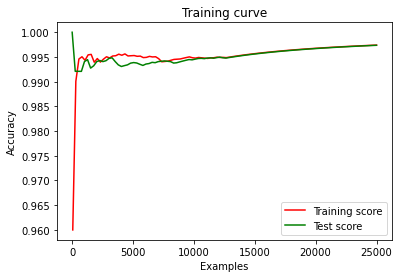

In [21]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("Training curve")
plt.xlabel("Examples")
plt.ylabel("Accuracy")
    
tr_samples= np.linspace(50, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = classification_report(y_train[:int(sample)], nb.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_accuracy , 'r', label= "Training score")    
    
    
test_samples= np.linspace(1, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], nb.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_accuracy , 'g', label= "Test score")    
    
plt.legend(loc="lower right")
    
plt.show()



Training sample size:  [50.0, 302.020202020202, 554.040404040404, 806.060606060606, 1058.080808080808, 1310.1010101010102, 1562.121212121212, 1814.141414141414, 2066.161616161616, 2318.181818181818, 2570.2020202020203, 2822.222222222222, 3074.242424242424, 3326.2626262626263, 3578.282828282828, 3830.3030303030305, 4082.3232323232323, 4334.343434343435, 4586.363636363636, 4838.383838383838, 5090.404040404041, 5342.424242424242, 5594.444444444444, 5846.464646464647, 6098.484848484848, 6350.50505050505, 6602.525252525253, 6854.545454545455, 7106.565656565656, 7358.585858585859, 7610.606060606061, 7862.626262626262, 8114.646464646465, 8366.666666666666, 8618.68686868687, 8870.70707070707, 9122.727272727272, 9374.747474747475, 9626.767676767677, 9878.787878787878, 10130.808080808081, 10382.828282828283, 10634.848484848484, 10886.868686868687, 11138.888888888889, 11390.90909090909, 11642.929292929293, 11894.949494949495, 12146.969696969696, 12398.9898989899, 12651.0101010101, 12903.03030303

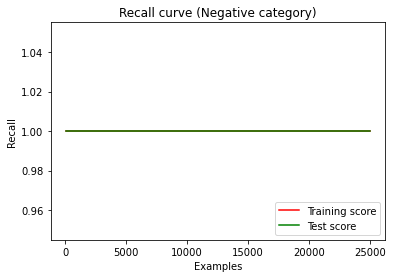

In [25]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("Recall curve (Negative category)")
plt.xlabel("Examples")
plt.ylabel("Recall")
    
tr_samples= np.linspace(50, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = classification_report(y_train[:int(sample)], nb.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_recall , 'r', label= "Training score")    

    
test_samples= np.linspace(50, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], nb.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_recall , 'g', label= "Test score")    
    
plt.legend(loc="lower right")
    
plt.show()


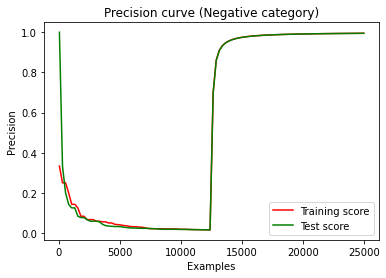

In [26]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("Precision curve (Negative category)")
plt.xlabel("Examples")
plt.ylabel("Precision")
    
tr_samples= np.linspace(50, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = classification_report(y_train[:int(sample)], nb.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_precision , 'r', label= "Training score")    
        
test_samples= np.linspace(50, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], nb.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_precision , 'g', label= "Test score")    
    
plt.legend(loc="lower right")
    
plt.show()


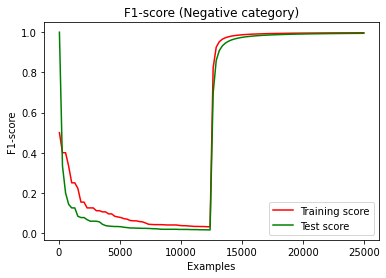

In [27]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("F1-score (Negative category)")
plt.xlabel("Examples")
plt.ylabel("F1-score")
    
tr_samples= np.linspace(50, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = classification_report(y_train[:int(sample)], nb.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_f1_score = [s['f1-score'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_f1_score , 'r', label= "Training score")    
        
test_samples= np.linspace(50, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], nb.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_f1_score = [s['f1-score'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_precision , 'g', label= "Test score")    
    
plt.legend(loc="lower right")
    
plt.show()


SKlearn implementation

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report as skl_classification_report

nb = GaussianNB()
nb.fit(x_train, y_train)
print(skl_classification_report(y_train, nb.predict(x_train),
                            zero_division=1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [31]:
print(skl_classification_report(y_test, nb.predict(x_test),
                            zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [ ]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("F1-score (Negative category)")
plt.xlabel("Examples")
plt.ylabel("F1-score")
    
tr_samples= np.linspace(50, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = skl_classification_report(y_train[:int(sample)], nb.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_f1_score = [s['f1-score'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_f1_score , 'r', label= "Training score")    
        
test_samples= np.linspace(50, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], nb.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_f1_score = [s['f1-score'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_precision , 'g', label= "Test score")    
    
plt.legend(loc="lower right")
    
plt.show()
